In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import ProbPlot
import matplotlib.pyplot as plt
import seaborn as sns
db1 = pd.read_excel('/Users/Alex/Google Drive (alex.keeney766@gmail.com)/College /Fall 2018/Research Methods/dataframePerminant.xlsx')
# create useable data WIthout 2008
db2 = db1.loc[db1.year != 2008, :]
#Howard and BYU are huge outliers, try removing.  First loc removes the schools, second removes 2008
data2 = db2[~db2.institution_name.isin(['Howard University', 'Brigham Young University-Provo'])].loc[:, 'Constant_Tuition':'Applicants']

In [3]:
# Attempt residual plots
import seaborn as sns
plt.style.use('seaborn') #pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)


model2 = ols('Constant_Tuition ~ Constant_APGF + Constant_AFSLF + Applicants + rank + Private', data2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:       Constant_Tuition   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     4687.
Date:                Sun, 09 Dec 2018   Prob (F-statistic):               0.00
Time:                        09:41:36   Log-Likelihood:                -9212.5
No. Observations:                 968   AIC:                         1.844e+04
Df Residuals:                     962   BIC:                         1.847e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.111e+04   1757.616      6.

In [4]:
model2_fitted_y = model2.fittedvalues

model2_residuals = model2.resid

model2_norm_residuals = model2.get_influence().resid_studentized_internal

model2_norm_residuals_abs_sqrt = np.sqrt(np.abs(model2_norm_residuals))

model2_abs_resid = np.abs(model2_residuals)

model2_leverage = model2.get_influence().hat_matrix_diag

model2_cooks = model2.get_influence().cooks_distance[0]

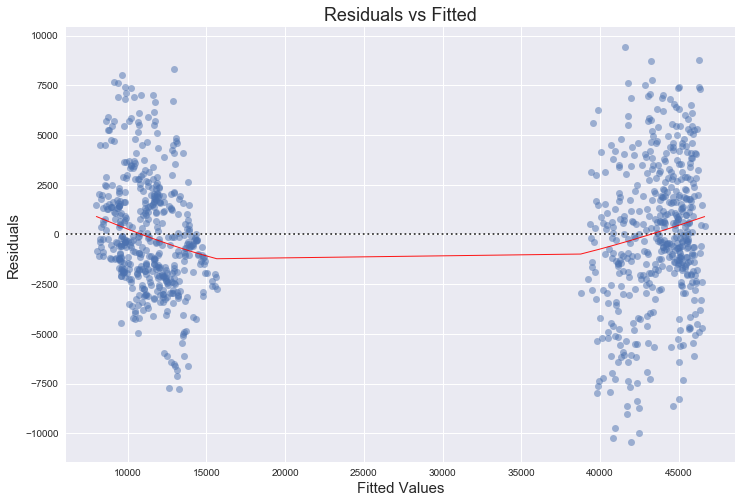

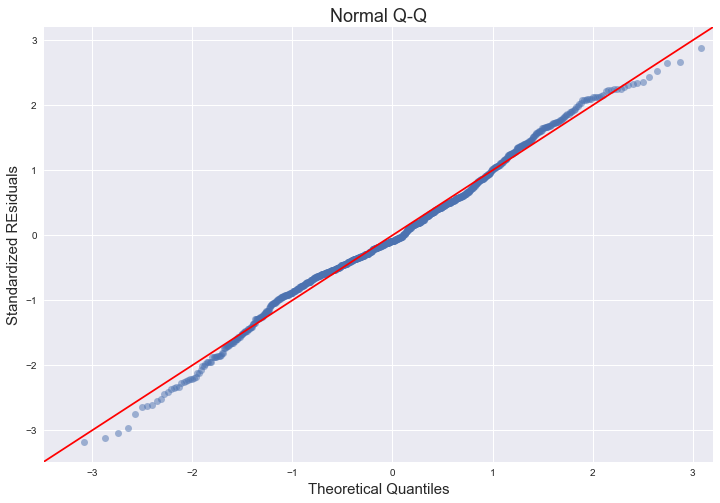

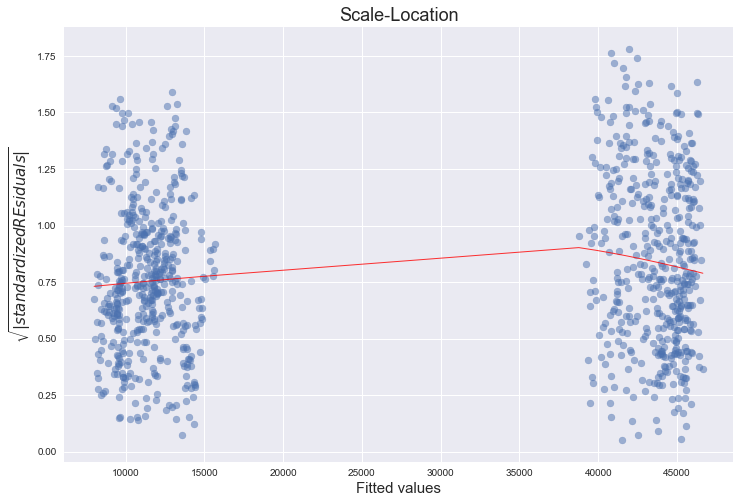

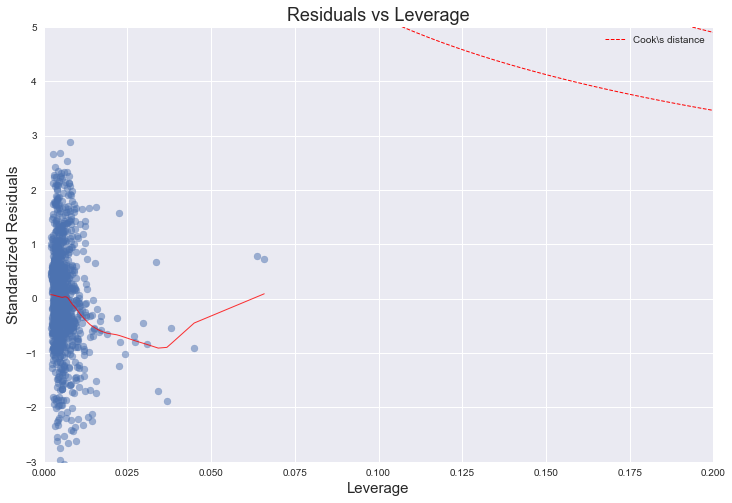

In [5]:
# Rsiduals Plots
#Residual v Fitted plot
plot_lm_1 = plt.figure(1)

plot_lm_1.set_figheight(8)

plot_lm_1.set_figwidth(12)


plot_lm_1.axes[0] = sns.residplot(model2_fitted_y, 'Constant_Tuition', data=data2,
                                  lowess = True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha':.9})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted Values')
plot_lm_1.axes[0].set_ylabel('Residuals')

abs_resid = model2_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

# for i in abs_resid_top_3.index:
#     plot_lm_1.axes[0].annotate(i, xy=(model2_fitted_y[i], model2_residuals[i]));
    
#QQ Plot
QQ = ProbPlot(model2_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized REsiduals');

    #annotations
# abs_norm_resid = np.flip(np.argsort(np.abs(model2_norm_residuals)), 0)
# abs_norm_resid_top_3 = abs_norm_resid[:3]

# for r, i in enumerate(abs_norm_resid_top_3):
#     plot_lm_2.axes[0].annotate(i, 
#                                xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
#                                    model2_norm_residuals[i]));
    
#Scale Location Plot
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model2_fitted_y, model2_norm_residuals_abs_sqrt, alpha=.5)
sns.regplot(model2_fitted_y, model2_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': .8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|standardized REsiduals|}$');

#annotations
# abs_sq_norm_resid = np.flip(np.argsort(model2_norm_residuals_abs_sqrt), 0)
# abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

# for i in abs_norm_resid_top_3:
#     plot_lm_3.axes[0].annotate(i,
#                                xy=(model2_fitted_y[i],
#                                    model2_norm_residuals_abs_sqrt[i]));

# Leverage Plot
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model2_leverage, model2_norm_residuals, alpha=.5)
sns.regplot(model2_leverage, model2_norm_residuals,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
            
plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')
            
#annotations
# leverage_top_3 = np.flip(np.argsort(model2_cooks), 0)[:3]

# for i in leverage_top_3:
#     plot_lm_4.axes[0].annotate(i, xy=(model2_leverage[i],
#                                      model2_norm_residuals[i]))

#shenanigans for cooks's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label = label, lw=1, ls='--', color='red')
    
p = len(model2.params)   #number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1-x)) / x),
     np.linspace(0.001, 0.200, 50),
     'Cook\s distance') #.5 line
graph(lambda x: np.sqrt((1 * p * (1-x)) / x),
     np.linspace(.001, .200, 50)) #1 line
plt.legend(loc = 'upper right');

In [5]:
# Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(data2)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

const               286.253567
Constant_Tuition     25.360764
Constant_APGF         1.145167
Constant_AFSLF        1.120997
rank                  1.893495
Private              23.874140
Applicants            1.497011
dtype: float64

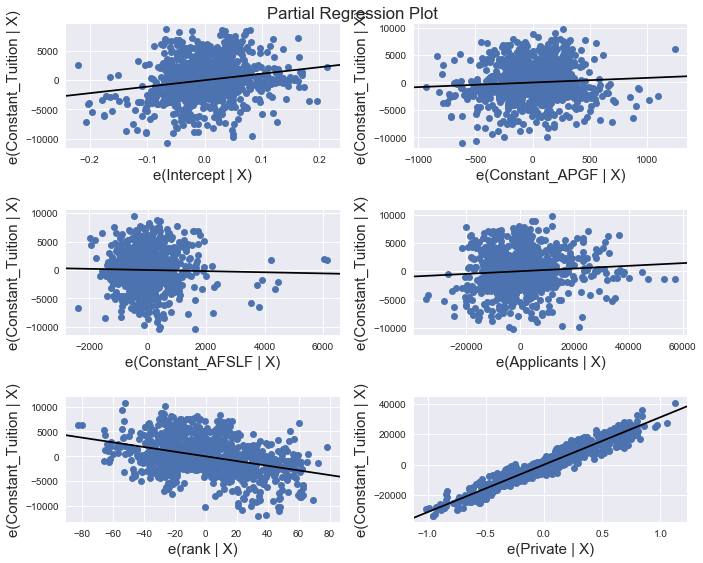

In [7]:
# Partial Regression Plots
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model2, fig = fig)

In [10]:
# 1 year analysis
data2016 = db1[~db1.institution_name.isin(['Howard University', 'Brigham Young University-Provo'])].loc[db1.year == 2016, 'Constant_Tuition':'Applicants']

In [11]:
model2016 = ols('Constant_Tuition ~ Constant_APGF + Constant_AFSLF + Applicants + rank + Private', data2016).fit()
print(model2016.summary())

                            OLS Regression Results                            
Dep. Variable:       Constant_Tuition   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     839.4
Date:                Wed, 05 Dec 2018   Prob (F-statistic):           1.02e-88
Time:                        08:50:06   Log-Likelihood:                -1138.6
No. Observations:                 121   AIC:                             2289.
Df Residuals:                     115   BIC:                             2306.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.591e+04   6471.916      2.

In [15]:
# possible log transformation
data2['log_Tuition'] = np.log(data2.Constant_Tuition)
data2['log_Applicants'] = np.log(data2.Applicants)

In [14]:
model2_log_response = ols('log_Tuition ~ Constant_APGF + Constant_AFSLF + Applicants + rank + Private', data2).fit()
print(model2_log_response.summary())

                            OLS Regression Results                            
Dep. Variable:            log_Tuition   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     2772.
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        08:56:07   Log-Likelihood:                 276.97
No. Observations:                 968   AIC:                            -541.9
Df Residuals:                     962   BIC:                            -512.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          9.4341      0.097     97.

In [9]:
model3 = ols('Constant_Tuition ~ Constant_APGF + Applicants + rank + Private', data2).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:       Constant_Tuition   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     5861.
Date:                Sun, 09 Dec 2018   Prob (F-statistic):               0.00
Time:                        10:20:44   Log-Likelihood:                -9212.8
No. Observations:                 968   AIC:                         1.844e+04
Df Residuals:                     963   BIC:                         1.846e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.062e+04   1633.235      6.505

In [10]:
model3_fitted_y = model3.fittedvalues

model3_residuals = model3.resid

model3_norm_residuals = model3.get_influence().resid_studentized_internal

model3_norm_residuals_abs_sqrt = np.sqrt(np.abs(model3_norm_residuals))

model3_abs_resid = np.abs(model3_residuals)

model3_leverage = model3.get_influence().hat_matrix_diag

model3_cooks = model3.get_influence().cooks_distance[0]

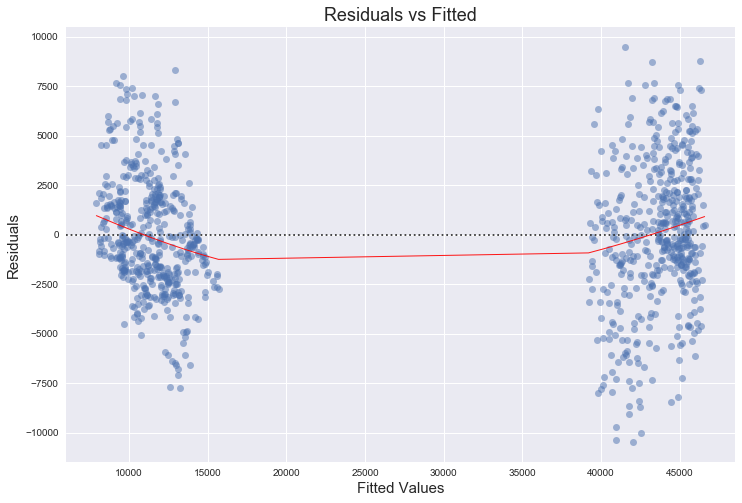

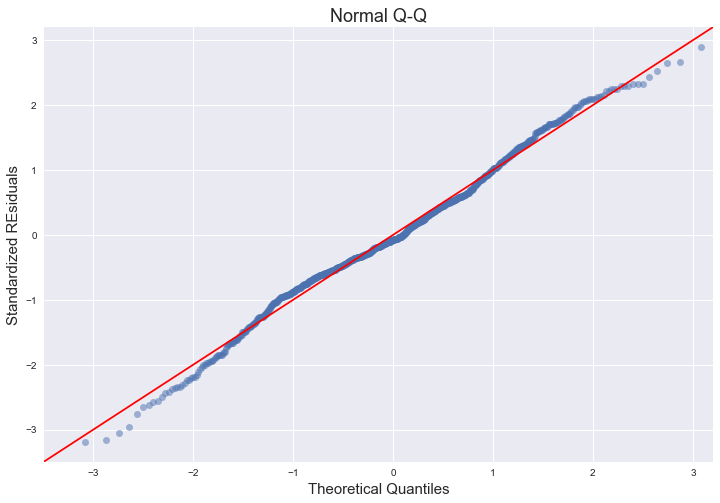

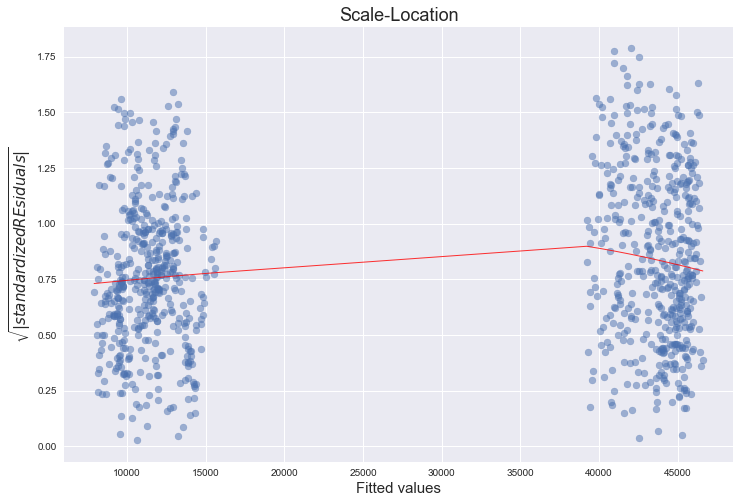

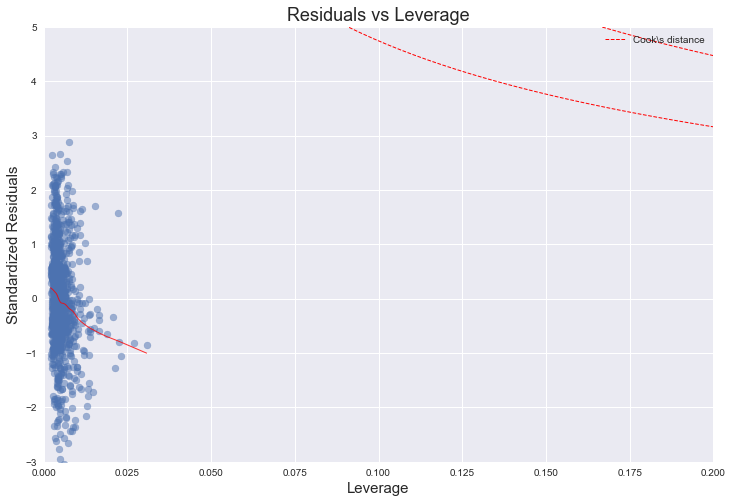

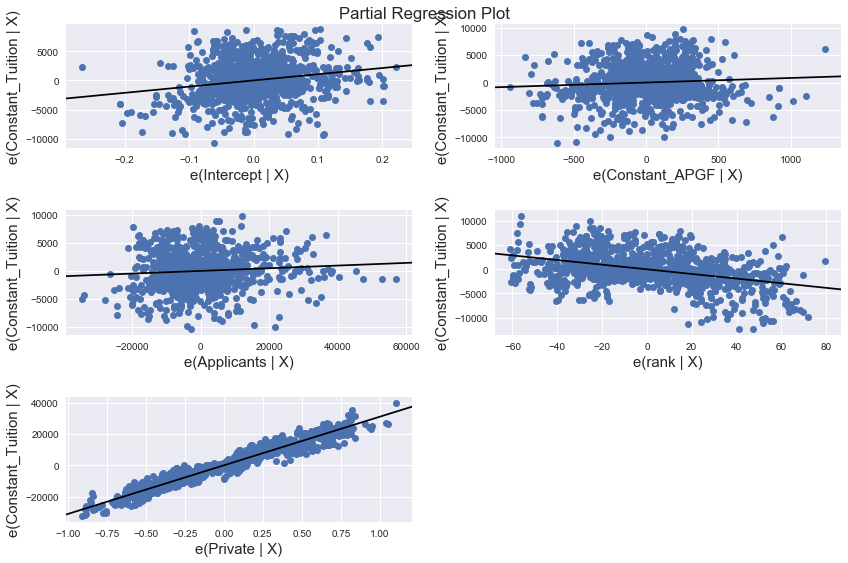

In [11]:
# Rsiduals Plots
#Residual v Fitted plot
plot_lm_1 = plt.figure(1)

plot_lm_1.set_figheight(8)

plot_lm_1.set_figwidth(12)


plot_lm_1.axes[0] = sns.residplot(model3_fitted_y, 'Constant_Tuition', data=data2,
                                  lowess = True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha':.9})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted Values')
plot_lm_1.axes[0].set_ylabel('Residuals')

abs_resid = model3_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

# for i in abs_resid_top_3.index:
#     plot_lm_1.axes[0].annotate(i, xy=(model3_fitted_y[i], model3_residuals[i]));
    
#QQ Plot
QQ = ProbPlot(model3_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized REsiduals');

    #annotations
# abs_norm_resid = np.flip(np.argsort(np.abs(model3_norm_residuals)), 0)
# abs_norm_resid_top_3 = abs_norm_resid[:3]

# for r, i in enumerate(abs_norm_resid_top_3):
#     plot_lm_2.axes[0].annotate(i, 
#                                xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
#                                    model3_norm_residuals[i]));
    
#Scale Location Plot
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model3_fitted_y, model3_norm_residuals_abs_sqrt, alpha=.5)
sns.regplot(model3_fitted_y, model3_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': .8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|standardized REsiduals|}$');

#annotations
# abs_sq_norm_resid = np.flip(np.argsort(model3_norm_residuals_abs_sqrt), 0)
# abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

# for i in abs_norm_resid_top_3:
#     plot_lm_3.axes[0].annotate(i,
#                                xy=(model3_fitted_y[i],
#                                    model3_norm_residuals_abs_sqrt[i]));

plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model3_leverage, model3_norm_residuals, alpha=.5)
sns.regplot(model3_leverage, model3_norm_residuals,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
            
plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')
            
#annotations
# leverage_top_3 = np.flip(np.argsort(model3_cooks), 0)[:3]

# for i in leverage_top_3:
#     plot_lm_4.axes[0].annotate(i, xy=(model3_leverage[i],
#                                      model3_norm_residuals[i]))

#shenanigans for cooks's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label = label, lw=1, ls='--', color='red')
    
p = len(model3.params)   #number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1-x)) / x),
     np.linspace(0.001, 0.200, 50),
     'Cook\s distance') #.5 line
graph(lambda x: np.sqrt((1 * p * (1-x)) / x),
     np.linspace(.001, .200, 50)) #1 line
plt.legend(loc = 'upper right');

# Partial Regression Plots
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model3, fig = fig)